In [1]:
from variables import template_dir, preprocessed_data_dir
import numpy as np
import nibabel as nb
import os

CPAC was imported and can be used, but wxPython was not found. In order to use the GUI, wxPython must be installed.
Error: No module named wx
working on adenauer

# # # # # # # # # # # # # # # # # # 
RUNNING FOLD no 0: subjects 0 ... 302 of 303 subjects
# # # # # # # # # # # # # # # # # # 
Using CPAC version 0.3.9.1
CPAC version OK
Using pandas version 0.16.0
pandas version OK
Using FSL version 5.0.8
FSL OK


In [2]:
metric_names_list = ['alff',
 'falff',
 'reho',
 'vmhc',
 'dc_b',
 'evc_b',
 'variability_std']

mask_file = os.path.join(template_dir, 'SPM_GM/SPM_GM_mask_3mm.nii.gz')
mask = nb.load(mask_file).get_data().astype('bool')
inv_mask = ~(mask)

In [3]:
data = []
data_names = []
masked_data = dict()

for metric_name in metric_names_list:
    in_file = os.path.join(preprocessed_data_dir, 'group_metric_meanRegression', metric_name, metric_name +'_merge.nii.gz')
    img_3d = nb.load(in_file).get_data()
    masked_data[metric_name] = img_3d[mask]

n_voxels = masked_data[metric_name].shape[0]
n_metrics = len(metric_names_list)

In [4]:
rs = np.zeros((n_voxels,n_metrics,n_metrics))
rs.fill(np.nan)
for v in range(n_voxels):   
    data = []
    for metric_name in metric_names_list:
        data.append(masked_data[metric_name][v,])
    data = np.array(data).T

    r = np.corrcoef(data.T)
    rs[v,:,:] = r     

In [5]:
mean_rs = np.nanmean(rs,0)
mean_rs

array([[ 1.        ,  0.717248  ,  0.26801317,  0.13093504,  0.23054917,
         0.21173155,  0.94939074],
       [ 0.717248  ,  1.        ,  0.47185994,  0.2283939 ,  0.35665935,
         0.28116136,  0.71585091],
       [ 0.26801317,  0.47185994,  1.        ,  0.3900923 ,  0.40006605,
         0.29206024,  0.31371746],
       [ 0.13093504,  0.2283939 ,  0.3900923 ,  1.        ,  0.31322098,
         0.22133084,  0.14964076],
       [ 0.23054917,  0.35665935,  0.40006605,  0.31322098,  1.        ,
         0.84969987,  0.27157165],
       [ 0.21173155,  0.28116136,  0.29206024,  0.22133084,  0.84969987,
         1.        ,  0.23572245],
       [ 0.94939074,  0.71585091,  0.31371746,  0.14964076,  0.27157165,
         0.23572245,  1.        ]])

In [6]:
%matplotlib inline
import pylab as plt
import seaborn as sns
import pandas as pd

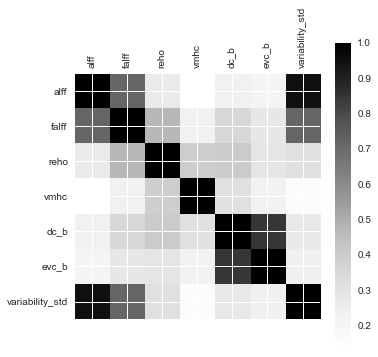

In [7]:
plt.matshow(mean_rs)
plt.colorbar()
ax = plt.gca()
ax.set_yticklabels(['']+metric_names_list);
ax.set_xticklabels(['']+metric_names_list, rotation='vertical');


In [8]:
voxel_data=[]
for m in metric_names_list:
    voxel_data.append(masked_data[m])
voxel_data=np.array(voxel_data)
mean_voxel_data=voxel_data.mean(1)
df=pd.DataFrame(mean_voxel_data.T, columns=metric_names_list)


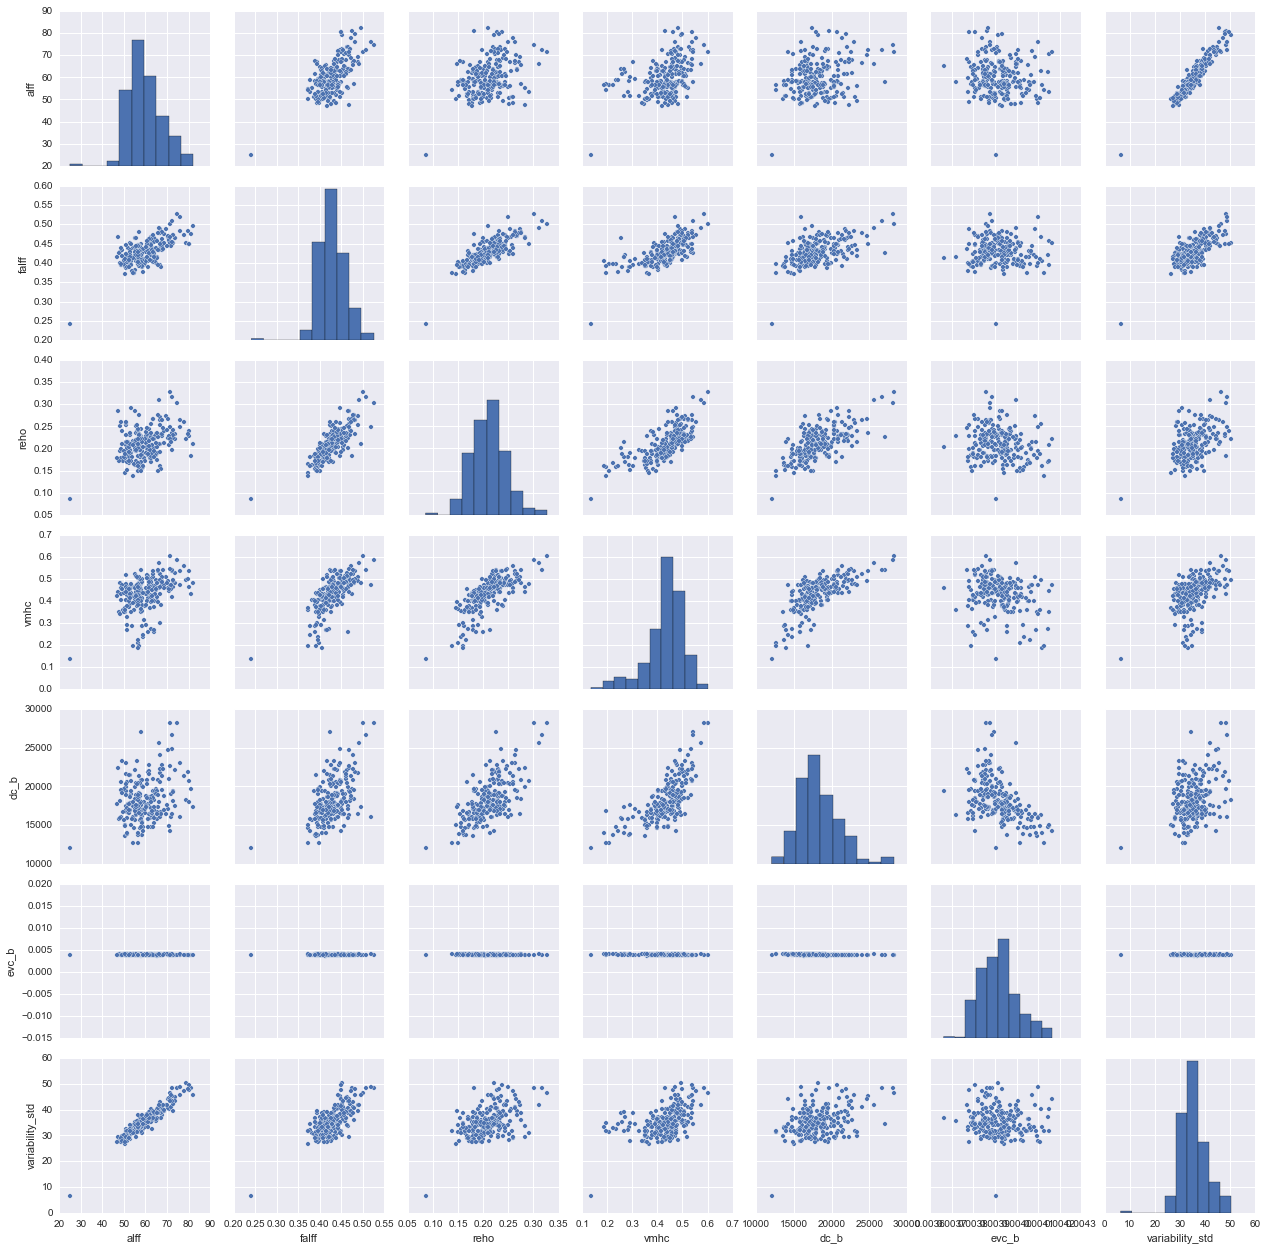

In [9]:
sns.pairplot(df)

In [10]:
sns.pairplot?